Jialin Shi

UID: 7948542502

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import confusion_matrix          
from sklearn.metrics import f1_score                  
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

1-(a)

In [2]:
# prepare feature name
col_name=pd.read_excel('colName.xls',header=None)
col_name=col_name.values.ravel()

# load data
df=pd.read_csv('communities.data.csv',header=None)
df.columns=col_name
df.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20       0.06   
1          ...               0.02     0.12            0.45          ?   
2          ...               0.01     0.21            0.02          ?   
3          ...               0.02     0.39            0.28          ?   
4          ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32             0.14                  0.20  
1                 0.00                ?                  0.67  
2                 0.00                ?                  0.43  
3                 0.00                ?                  0.12  
4                 0.00                ?                  0.03  

[5 rows x 128 columns]

In [3]:
# drop non-predictors
df2 = df.iloc[:,5:]
df2_col=df2.columns
df2.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20       0.06   
1          ...               0.02     0.12            0.45          ?   
2          ...               0.01     0.21            0.02          ?   
3          ...               0.02     0.39            0.28          ?   
4          ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32             0.14                  0.20  
1                 0.00                ?                  0.67  
2                 0.00                ?                  0.43  
3                 0.00                ?                  0.12  
4                 0.00                ?                  0.03  

[5 rows x 123 columns]

1-(b)

In [4]:
# replace "?" with Null value
df2=df2.replace({'?':np.NaN})

# impute missing value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df2)       
SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='mean', verbose=0)
df2=pd.DataFrame(imp.transform(df2))        
df2.columns=df2_col
df2.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

           ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0          ...               0.12     0.26            0.20   0.060000   
1          ...               0.02     0.12            0.45   0.163103   
2          ...               0.01     0.21            0.02   0.163103   
3          ...               0.02     0.39            0.28   0.163103   
4          ...               0.04     0.09            0.02   0.163103   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0       0.040000             0.900000             0.500000   
1       0.076708             0.698589             0.440439   
2       0.076708             0.698589             0.440439   
3       0.076708             0.698589             0.440439   
4       0.076708             0.698589             0.440439   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop   
0                 0.32         0.140000                  0.20  
1                 0.00         0.195078                  0.67  
2                 0.00         0.195078                  0.43  
3                 0.00         0.195078                  0.12  
4                 0.00         0.195078                  0.03  

[5 rows x 123 columns]

In [5]:
# add lable for train/test set
df2['set']=pd.Series()
df2['set'][0:1495]='train'
df2['set'][1495:]='test'
df2.head()

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...    \
0         0.17         0.34         0.47         0.29        0.32  ...     
1         0.07         0.26         0.59         0.35        0.27  ...     
2         0.04         0.39         0.47         0.28        0.32  ...     
3         0.10         0.51         0.50         0.34        0.21  ...     
4         0.05         0.38         0.38         0.23        0.36  ...     

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20   0.060000       0.040000             0.900000   
1     0.12            0.45   0.163103       0.076708             0.698589   
2     0.21            0.02   0.163103       0.076708             0.698589   
3     0.39            0.28   0.163103       0.076708             0.698589   
4     0.09            0.02   0.163103       0.076708             0.698589   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0             0.500000                 0.32         0.140000   
1             0.440439                 0.00         0.195078   
2             0.440439                 0.00         0.195078   
3             0.440439                 0.00         0.195078   
4             0.440439                 0.00         0.195078   

   ViolentCrimesPerPop     set  
0                  0.20  train  
1                  0.67  train  
2                  0.43  train  
3                  0.12  train  
4                  0.03  train  

[5 rows x 124 columns]

1-(c) plot correlation

In [6]:
col_new=col_name.tolist()
col_new.append('set')

In [7]:
# concat 5 non-predictor back to data.
nonp=df.iloc[:,:5]
nonp.replace('?',np.NaN,inplace = True)
dt_full=pd.DataFrame(np.c_[nonp,df2])
dt_full.columns=col_new
dt_full.head()

state county community        communityname fold population householdsize  \
0     8    NaN       NaN         Lakewoodcity    1       0.19          0.33   
1    53    NaN       NaN          Tukwilacity    1          0          0.16   
2    24    NaN       NaN         Aberdeentown    1          0          0.42   
3    34      5     81440  Willingborotownship    1       0.04          0.77   
4    42     95      6096    Bethlehemtownship    1       0.01          0.55   

  racepctblack racePctWhite racePctAsian  ...   PopDens PctUsePubTrans  \
0         0.02          0.9         0.12  ...      0.26            0.2   
1         0.12         0.74         0.45  ...      0.12           0.45   
2         0.49         0.56         0.17  ...      0.21           0.02   
3            1         0.08         0.12  ...      0.39           0.28   
4         0.02         0.95         0.09  ...      0.09           0.02   

  PolicCars PolicOperBudg LemasPctPolicOnPatr LemasGangUnitDeploy  \
0      0.06          0.04                 0.9                 0.5   
1  0.163103     0.0767085            0.698589            0.440439   
2  0.163103     0.0767085            0.698589            0.440439   
3  0.163103     0.0767085            0.698589            0.440439   
4  0.163103     0.0767085            0.698589            0.440439   

  LemasPctOfficDrugUn PolicBudgPerPop ViolentCrimesPerPop     set  
0                0.32            0.14                  0.2  train  
1                   0        0.195078                 0.67  train  
2                   0        0.195078                 0.43  train  
3                   0        0.195078                 0.12  train  
4                   0        0.195078                 0.03  train  

[5 rows x 129 columns]

In [8]:
corr = df2.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_properties(**{'font-size': '1pt'})

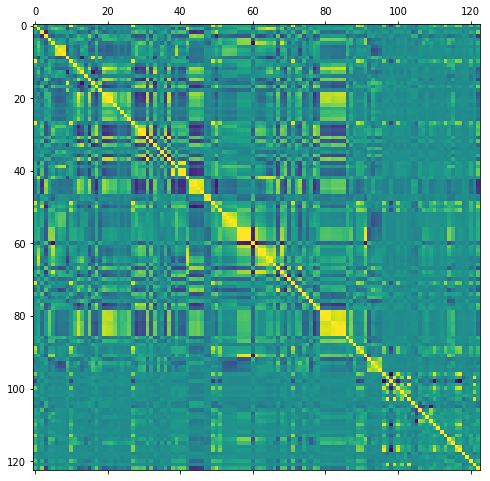

In [9]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (8, 8)
plt.matshow(df2.corr())
plt.show()

1-(d)

In [10]:
t=df2.describe()
std_squared=(t.iloc[2,:].values)
mean=(t.iloc[1,:].values)
df_cv = std_squared/mean
df_cv

array([2.20350254, 0.3532983 , 1.4109204 , 0.32378156, 1.35916219,
       1.61427779, 0.36583987, 0.29069289, 0.49516051, 0.42344171,
       2.00174364, 0.63884887, 0.57975339, 0.32771006, 0.70003012,
       0.35923995, 0.36851263, 0.6990305 , 0.34963908, 0.52773189,
       0.54563343, 0.50755219, 0.589469  , 0.80968509, 0.60619385,
       0.67064457, 0.47395972, 2.30496971, 0.75398017, 0.67560022,
       0.52828627, 0.57840084, 0.5561328 , 0.34732725, 0.51058034,
       0.39822568, 0.50846131, 0.42210586, 0.39558337, 0.40381162,
       0.3592727 , 0.37146815, 0.31695475, 0.33061114, 0.33247588,
       0.32942584, 0.32855095, 0.33624845, 0.33272212, 2.99419645,
       0.91980289, 2.90049716, 0.68420109, 0.58489027, 0.50490986,
       0.45566604, 1.3001003 , 1.29763181, 1.28123297, 1.28403377,
       0.28867317, 1.4590666 , 0.73453473, 0.75710873, 0.36691384,
       0.31940729, 0.46845379, 0.35031616, 1.12719959, 0.34837064,
       0.81088779, 1.95877973, 0.26964697, 0.33754097, 1.06474

1-(e)

In [11]:
# festure numbers
128**(1/2)

11.313708498984761

In [12]:
# calculate cv and sort in descending.
df_cv=pd.DataFrame(df_cv)
df_cv.index = df2_col
df_cv=df_cv.sort_index(by=0,ascending=False)
df_cv.iloc[0:11,:]


/Users/jialinshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


0
NumStreet            4.407702
NumInShelters        3.485481
NumIlleg             2.994196
NumImmig             2.900497
LemasPctOfficDrugUn  2.555266
NumUnderPov          2.304970
population           2.203503
numbUrban            2.001744
HousVacant           1.958780
LandArea             1.678031
racePctHisp          1.614278

In [13]:
cv_11=df_cv.iloc[0:11,:].index.tolist()
cv_11

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

In [14]:
# top 11 cv features-dataframe
df_11 = df2[cv_11]
df_11.head()

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05

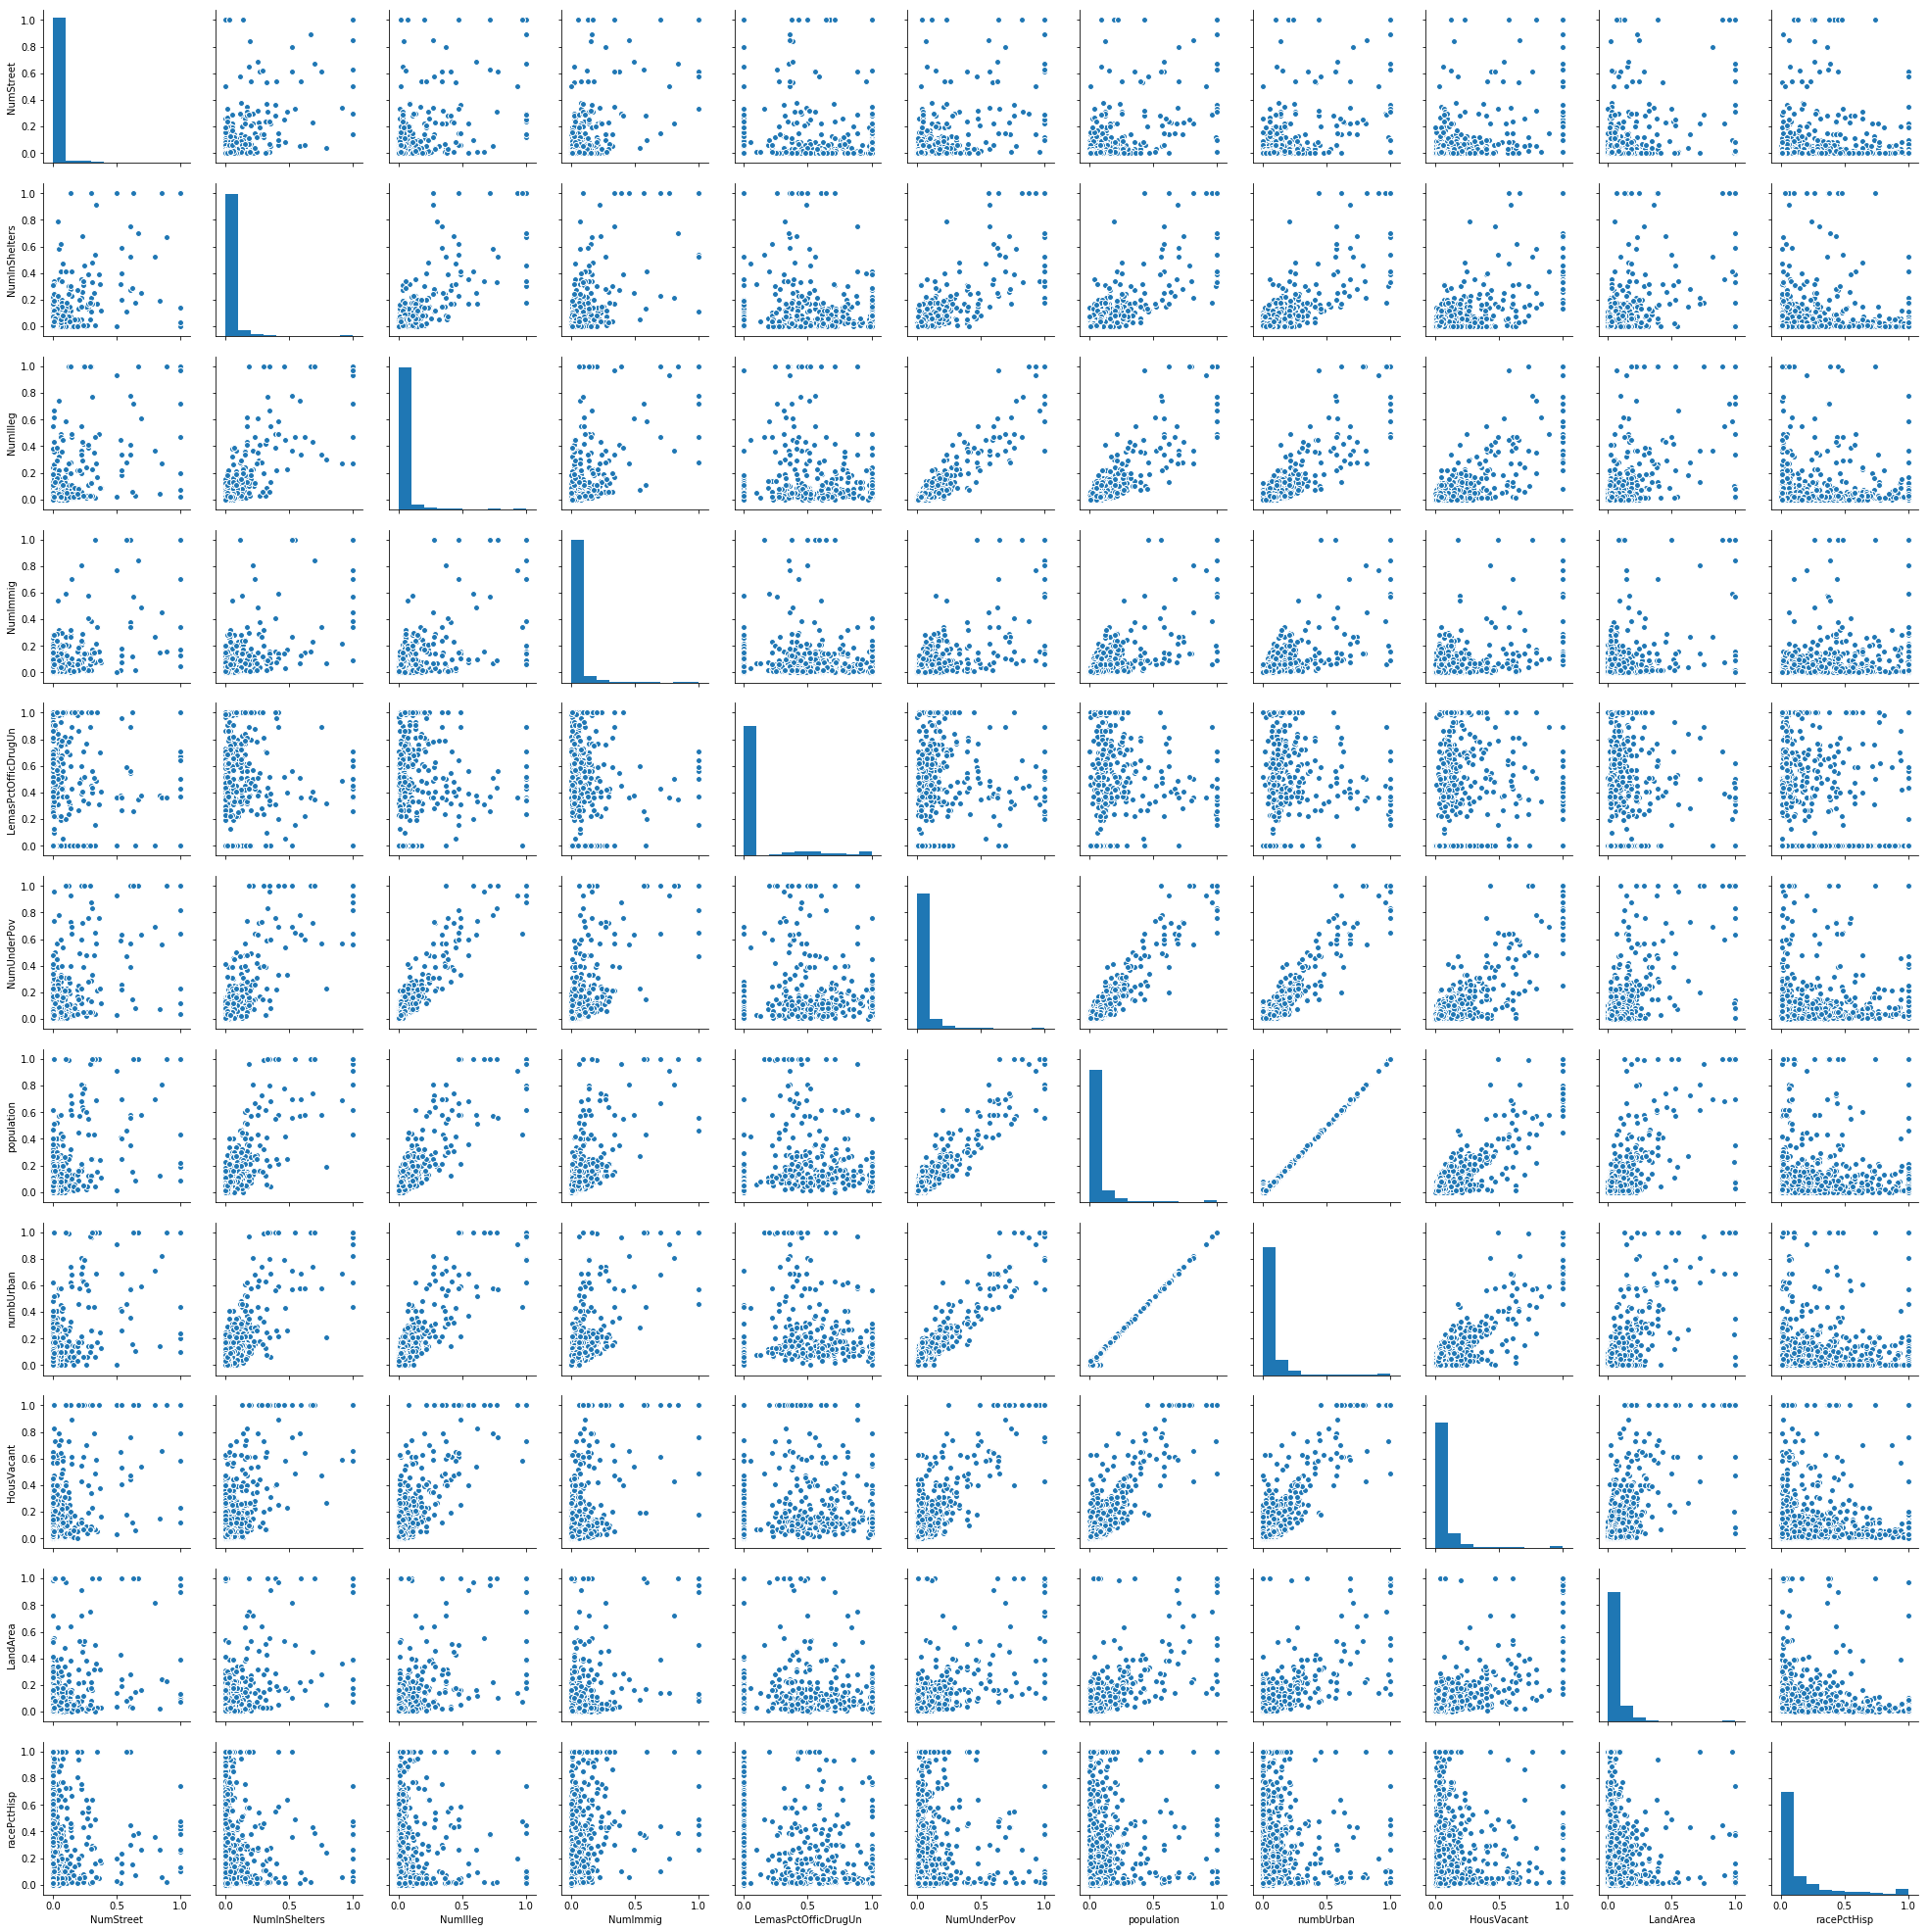

In [15]:
sns.pairplot(df_11)
plt.show()

#### 1-(e) not very obvious except population and numUrban has a linear relationship.


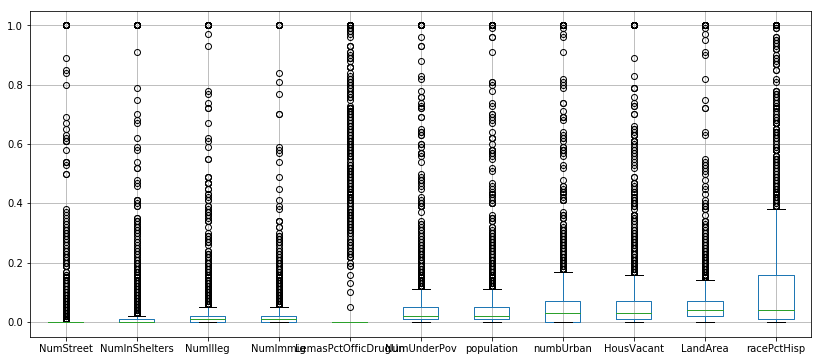

In [16]:
plt.figure(figsize=[14,6])
df_11.boxplot()
plt.show()

1-(f)

In [17]:
# split train and test
f_train=df2[df2['set']=='train']
f_test=df2[df2['set']=='test']

In [18]:
# build a linear model
X = f_train.iloc[:,:-2]
Y = f_train.iloc[:,-2]
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     ViolentCrimesPerPop    R-squared:                       0.712
Model:                              OLS   Adj. R-squared:                  0.686
Method:                   Least Squares   F-statistic:                     27.78
Date:                  Tue, 05 Mar 2019   Prob (F-statistic):          6.88e-291
Time:                          15:36:44   Log-Likelihood:                 957.23
No. Observations:                  1495   AIC:                            -1668.
Df Residuals:                      1372   BIC:                            -1015.
Df Model:                           122                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [19]:
from sklearn.metrics import mean_squared_error
# MSE.test 
Xt = f_test.iloc[:,:-2]
Yt = f_test.iloc[:,-2]
Xt2 = sm.add_constant(Xt)
pred=est2.predict(Xt2)
MSEtest= mean_squared_error(Yt,pred)
MSEtest

0.7897255273852613

#### 1-(f)  for linear model, test MSE=0.7897

1-(g)

In [20]:
# RidgeCV
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=5)
model.fit(X, Y)
y_pred=model.predict(Xt)
MSE= mean_squared_error(Yt,y_pred)
MSE

0.017737081104303696

#### 1-(g) for Ridge Regression, test mse=0.0177

1-（h）

In [21]:
# LassoCV
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X, Y)
pred=lasso.predict(Xt) 
MSE= mean_squared_error(Yt,pred)
MSE

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.017763310017858247

In [22]:
# list of the selected features
ind=np.array(np.where(lasso.coef_!=0))[0]
X.columns[ind]

Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStr

#### 1-(h) for Lasso, test mse =0.01776
and the list is: 
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
       'PctBornSameState', 'PctSameCity85', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'PctPolicBlack', 'PctPolicAsian', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn', 'PolicBudgPerPop']

In [23]:
## standardize
from sklearn import preprocessing
from sklearn.preprocessing import scale
Xs=scale(X)
Xts=scale(Xt)
# LassoCV
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(Xs, Y)
pred=lasso.predict(Xts) 
MSE= mean_squared_error(Yt,pred)
MSE

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

0.017998418592939724

#### 1-(h) before scaling, test mse =0.01776 ;  after scaling, test mse=0.01799
#### after scaling test mse rises.

1-(i)

best_i is: 96 mse is: 0.019321939832403674


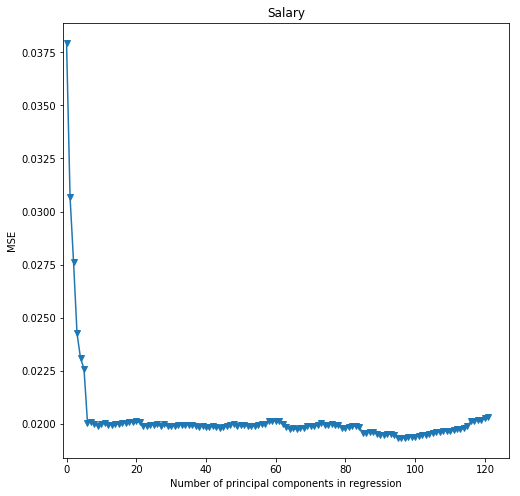

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics 
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression

pca = PCA()
X_reduced=pca.fit_transform(X)
n=len(X_reduced)

# 10-fold CV, with shuffle
kf_5=model_selection.KFold(n_splits=5,shuffle=True, random_state=1)
regr = LinearRegression()
mse=[]
best_mse=10000
best_i=-1

# Calculate MSE using CV for the 122 principle components, adding one component at the time.
for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], Y.ravel(), cv=kf_5, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if best_mse>mse[-1]:
        best_mse=mse[-1]
        best_i=i
        best_X=X_reduced[:,:i]
        
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

print('best_i is:',best_i, "mse is:", best_mse)

#### 1-(i) best_i =96, and mse = 0.0193

1-(j)

In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [26]:
# transform data format for xgboost
data_dmatrix = xgb.DMatrix(data=X,label=Y)
alpha=[1e-5,1e-4,1e-3,1e-2,1,5,10,20]
cv=[]
best_i=-1
mse0=1000
for i in alpha:
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': i}
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                        num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
    result_summary=cv_results.describe().iloc[1,2]
    cv.append(result_summary)
    if mse0>cv[-1]:
        mse0=cv[-1]
        best_i=i
        

[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_

[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_

[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_

[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_

[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_

[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_

[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_

[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_

[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_

[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[15:36:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_

In [27]:
cv

[0.16545099600000002,
 0.17389916756756757,
 0.16525433199999998,
 0.16478201599999998,
 0.166099608,
 0.17072914400000003,
 0.17461418000000006,
 0.18455447200000002]

In [28]:
print('best aplha is:', best_i, ' with best mse :', mse0)

best aplha is: 0.01  with best mse : 0.16478201599999998


#### 1-(j) best aplha is: 0.01  with best mse : 0.16478

## Problem 2

2-(b)

In [29]:
# load data
df_p2_test=pd.read_csv('aps_failure_test_set.csv',header=0,skiprows=20)
df_p2_train=pd.read_csv('aps_failure_training_set.csv',header=0,skiprows=20)

#### 2-(b)-i Seven Common methods

1.Listwise Deletion: Delete all data from any participant with missing values. If your sample is large enough, then you likely can drop data without substantial loss of statistical power. Be sure that the values are missing at random and that you are not inadvertently removing a class of participants.

2.Recover the Values: You can sometimes contact the participants and ask them to fill out the missing values. For in-person studies, we’ve found having an additional check for missing values before the participant leaves helps.

3. Educated Guessing: It sounds arbitrary and isn’t your preferred course of action, but you can often infer a missing value. For related questions, for example, like those often presented in a matrix, if the participant responds with all “4s”, assume that the missing value is a "4s"

4.Average Imputation: Use the average value of the responses from the other participants to fill in the missing value. If the average of the 30 responses on the question is a 4.1, use a 4.1 as the imputed value. This choice is not always recommended because it can artificially reduce the variability of your data but in some cases makes sense.

5.Common-Point Imputation: For a rating scale, using the middle point or most commonly chosen value. For example, on a five-point scale, substitute a 3, the midpoint, or a 4, the most common value (in many cases). This is a bit more structured than guessing, but it’s still among the more risky options. Use caution unless you have good reason and data to support using the substitute value.

6. Regression Substitution: You can use multiple-regression analysis to estimate a missing value. We use this technique to deal with missing SUS scores. Regression substitution predicts the missing value from the other values. In the case of missing SUS data, we had enough data to create stable regression equations and predict the missing values automatically in the calculator.

7. Multiple Imputation: The most sophisticated and, currently, most popular approach is to take the regression idea further and take advantage of correlations between responses. In multiple imputation, software creates plausible values based on the correlations for the missing data and then averages the simulated datasets by incorporating random errors in your predictions. It is one of a number of examples where computers continue to change the statistical landscape. Most statistical packages like SPSS come with a multiple-imputation feature. More on multiple imputation.

In [30]:
full_df=pd.concat([df_p2_test,df_p2_train])
np.shape(full_df)

(76000, 171)

In [31]:
full_df.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816     na   1010    936      0      0      0      0      0   
4   neg    1814     na    156    140      0      0      0      0      0   

   ...    ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...      1098     138     412     654       78      88       0      0   
1  ...      1068     276    1620     116       86     462       0      0   
2  ...    495076  380368  440134  269556  1315022  153680     516      0   
3  ...    540820  243270  483302  485332   431376  210074  281662   3232   
4  ...      7646    4144   18466   49782     3176     482      76      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 171 columns]

In [32]:
col_2=full_df.columns[1:].tolist()
col_2.append('class')
len(col_2)

171

In [33]:
# replace "?" with Null value
full_df=full_df.replace({'na':np.NaN})
full_df.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816    NaN   1010    936      0      0      0      0      0   
4   neg    1814    NaN    156    140      0      0      0      0      0   

   ...    ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...      1098     138     412     654       78      88       0      0   
1  ...      1068     276    1620     116       86     462       0      0   
2  ...    495076  380368  440134  269556  1315022  153680     516      0   
3  ...    540820  243270  483302  485332   431376  210074  281662   3232   
4  ...      7646    4144   18466   49782     3176     482      76      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 171 columns]

In [34]:
# impute missing value
df_imp=full_df.iloc[:,1:]
imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp2.fit(df_imp)       
SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='mean', verbose=0)
df_imp= pd.DataFrame(imp2.transform(df_imp))
df_imp['class']=full_df['class'].reset_index(drop=True)
df_imp.head()

0        1       2      3    4    5    6    7    8         9  ...    \
0     60.0  0.00000    20.0   12.0  0.0  0.0  0.0  0.0  0.0    2682.0  ...     
1     82.0  0.00000    68.0   40.0  0.0  0.0  0.0  0.0  0.0       0.0  ...     
2  66002.0  2.00000   212.0  112.0  0.0  0.0  0.0  0.0  0.0  199486.0  ...     
3  59816.0  0.72556  1010.0  936.0  0.0  0.0  0.0  0.0  0.0       0.0  ...     
4   1814.0  0.72556   156.0  140.0  0.0  0.0  0.0  0.0  0.0       0.0  ...     

        161       162       163        164       165       166     167  168  \
0     138.0     412.0     654.0       78.0      88.0       0.0     0.0  0.0   
1     276.0    1620.0     116.0       86.0     462.0       0.0     0.0  0.0   
2  380368.0  440134.0  269556.0  1315022.0  153680.0     516.0     0.0  0.0   
3  243270.0  483302.0  485332.0   431376.0  210074.0  281662.0  3232.0  0.0   
4    4144.0   18466.0   49782.0     3176.0     482.0      76.0     0.0  0.0   

   169  class  
0  0.0    neg  
1  0.0    neg  
2  0.0    neg  
3  0.0    neg  
4  0.0    neg  

[5 rows x 171 columns]

In [35]:
# add class back to df
df_imp['class']=full_df.iloc[:,0].tolist()
# split test and train
df_p2_test=df_imp.iloc[0:16000,:]
df_p2_train=df_imp.iloc[16000:76000,:]
df_p2_test.columns=col_2
df_p2_train.columns=col_2

In [36]:
#prepare data for weka
df_p2_train.to_csv('a.csv',index=False)
df_p2_test.to_csv('test.csv',index=False)

2-b－ii

In [37]:
h=df_imp.describe()
std_squared=(h.iloc[2,:].values)
mean=(h.iloc[1,:].values)
cov=std_squared/mean
cov

array([  4.32860784,   2.17827259,   2.16765331, 206.72149958,
        22.29367043,  18.2090155 ,  91.4606536 ,  42.08434253,
        17.62590857,   8.75329952,   5.47511626,   2.96422993,
         2.35258788,   2.81249798,   6.27498008,  32.16705734,
         2.31554009,  18.50630813,  43.14447956,  78.62298774,
         9.11199122,   9.06719545,   2.25422665,   2.27611448,
         3.08588489,   2.85347132,  10.56920232, 113.88275538,
        23.18705993,  86.08563751,   5.73048536,   3.85903499,
        40.90251876,  49.24863459,  38.34231917,  28.33003562,
        33.04013196,  12.00906055,   3.02192143,   3.24989535,
         3.94378127,  77.4611013 ,   9.0198696 ,   7.37496713,
        12.0504278 ,   7.56556917,   2.83781495,   3.06664911,
         8.70440642,  15.38215677,  22.41487873,  77.99955639,
         2.68856313,   2.64754524,   2.88693519,   2.72997428,
         2.6414276 ,   2.70333977,   2.99693885,   2.82209899,
         6.70506938,   9.52599041,   2.4099531 ,   6.69

2-b-iii

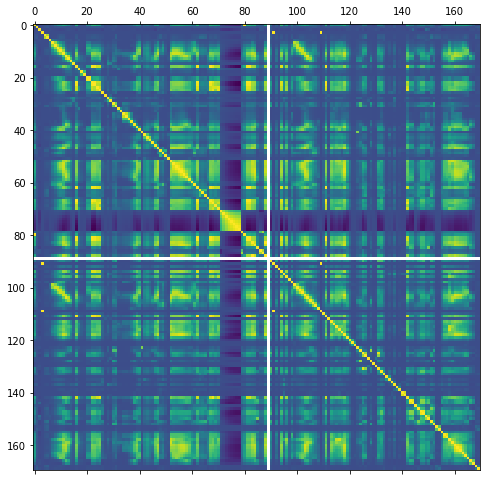

In [38]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (8, 8)
plt.matshow(df_imp.corr())
plt.show()

### 2-b-iv

In [39]:
# festure numbers
170**(1/2)

13.038404810405298

In [40]:
# calculate cv and sort in descending.
cov=pd.DataFrame(cov)
cov.index = full_df.columns[1:].tolist()
cov=cov.sort_index(by=0,ascending=False)
cov.iloc[0:13,:].index

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000',
       'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

In [41]:
new_col=cov.iloc[0:13,:].index.tolist()
new_col.append('class')
df_imp.columns=col_2
b_iv=df_imp[new_col]
b_iv.head()

cf_000  co_000  ad_000  cs_009  dj_000  as_000  dh_000  df_000  ag_000  \
0     0.0     8.0    12.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     2.0    14.0    40.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0    52.0   112.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0  1278.0   936.0     0.0     0.0     0.0    60.0     0.0     0.0   
4     0.0     2.0   140.0     0.0     0.0     0.0     0.0     0.0     0.0   

   au_000  ak_000  az_009  ay_009 class  
0     0.0     0.0     0.0     2.0   neg  
1     0.0     0.0     0.0     0.0   neg  
2     0.0     0.0     0.0     0.0   neg  
3     0.0     0.0     0.0     0.0   neg  
4     0.0     0.0     0.0     0.0   neg

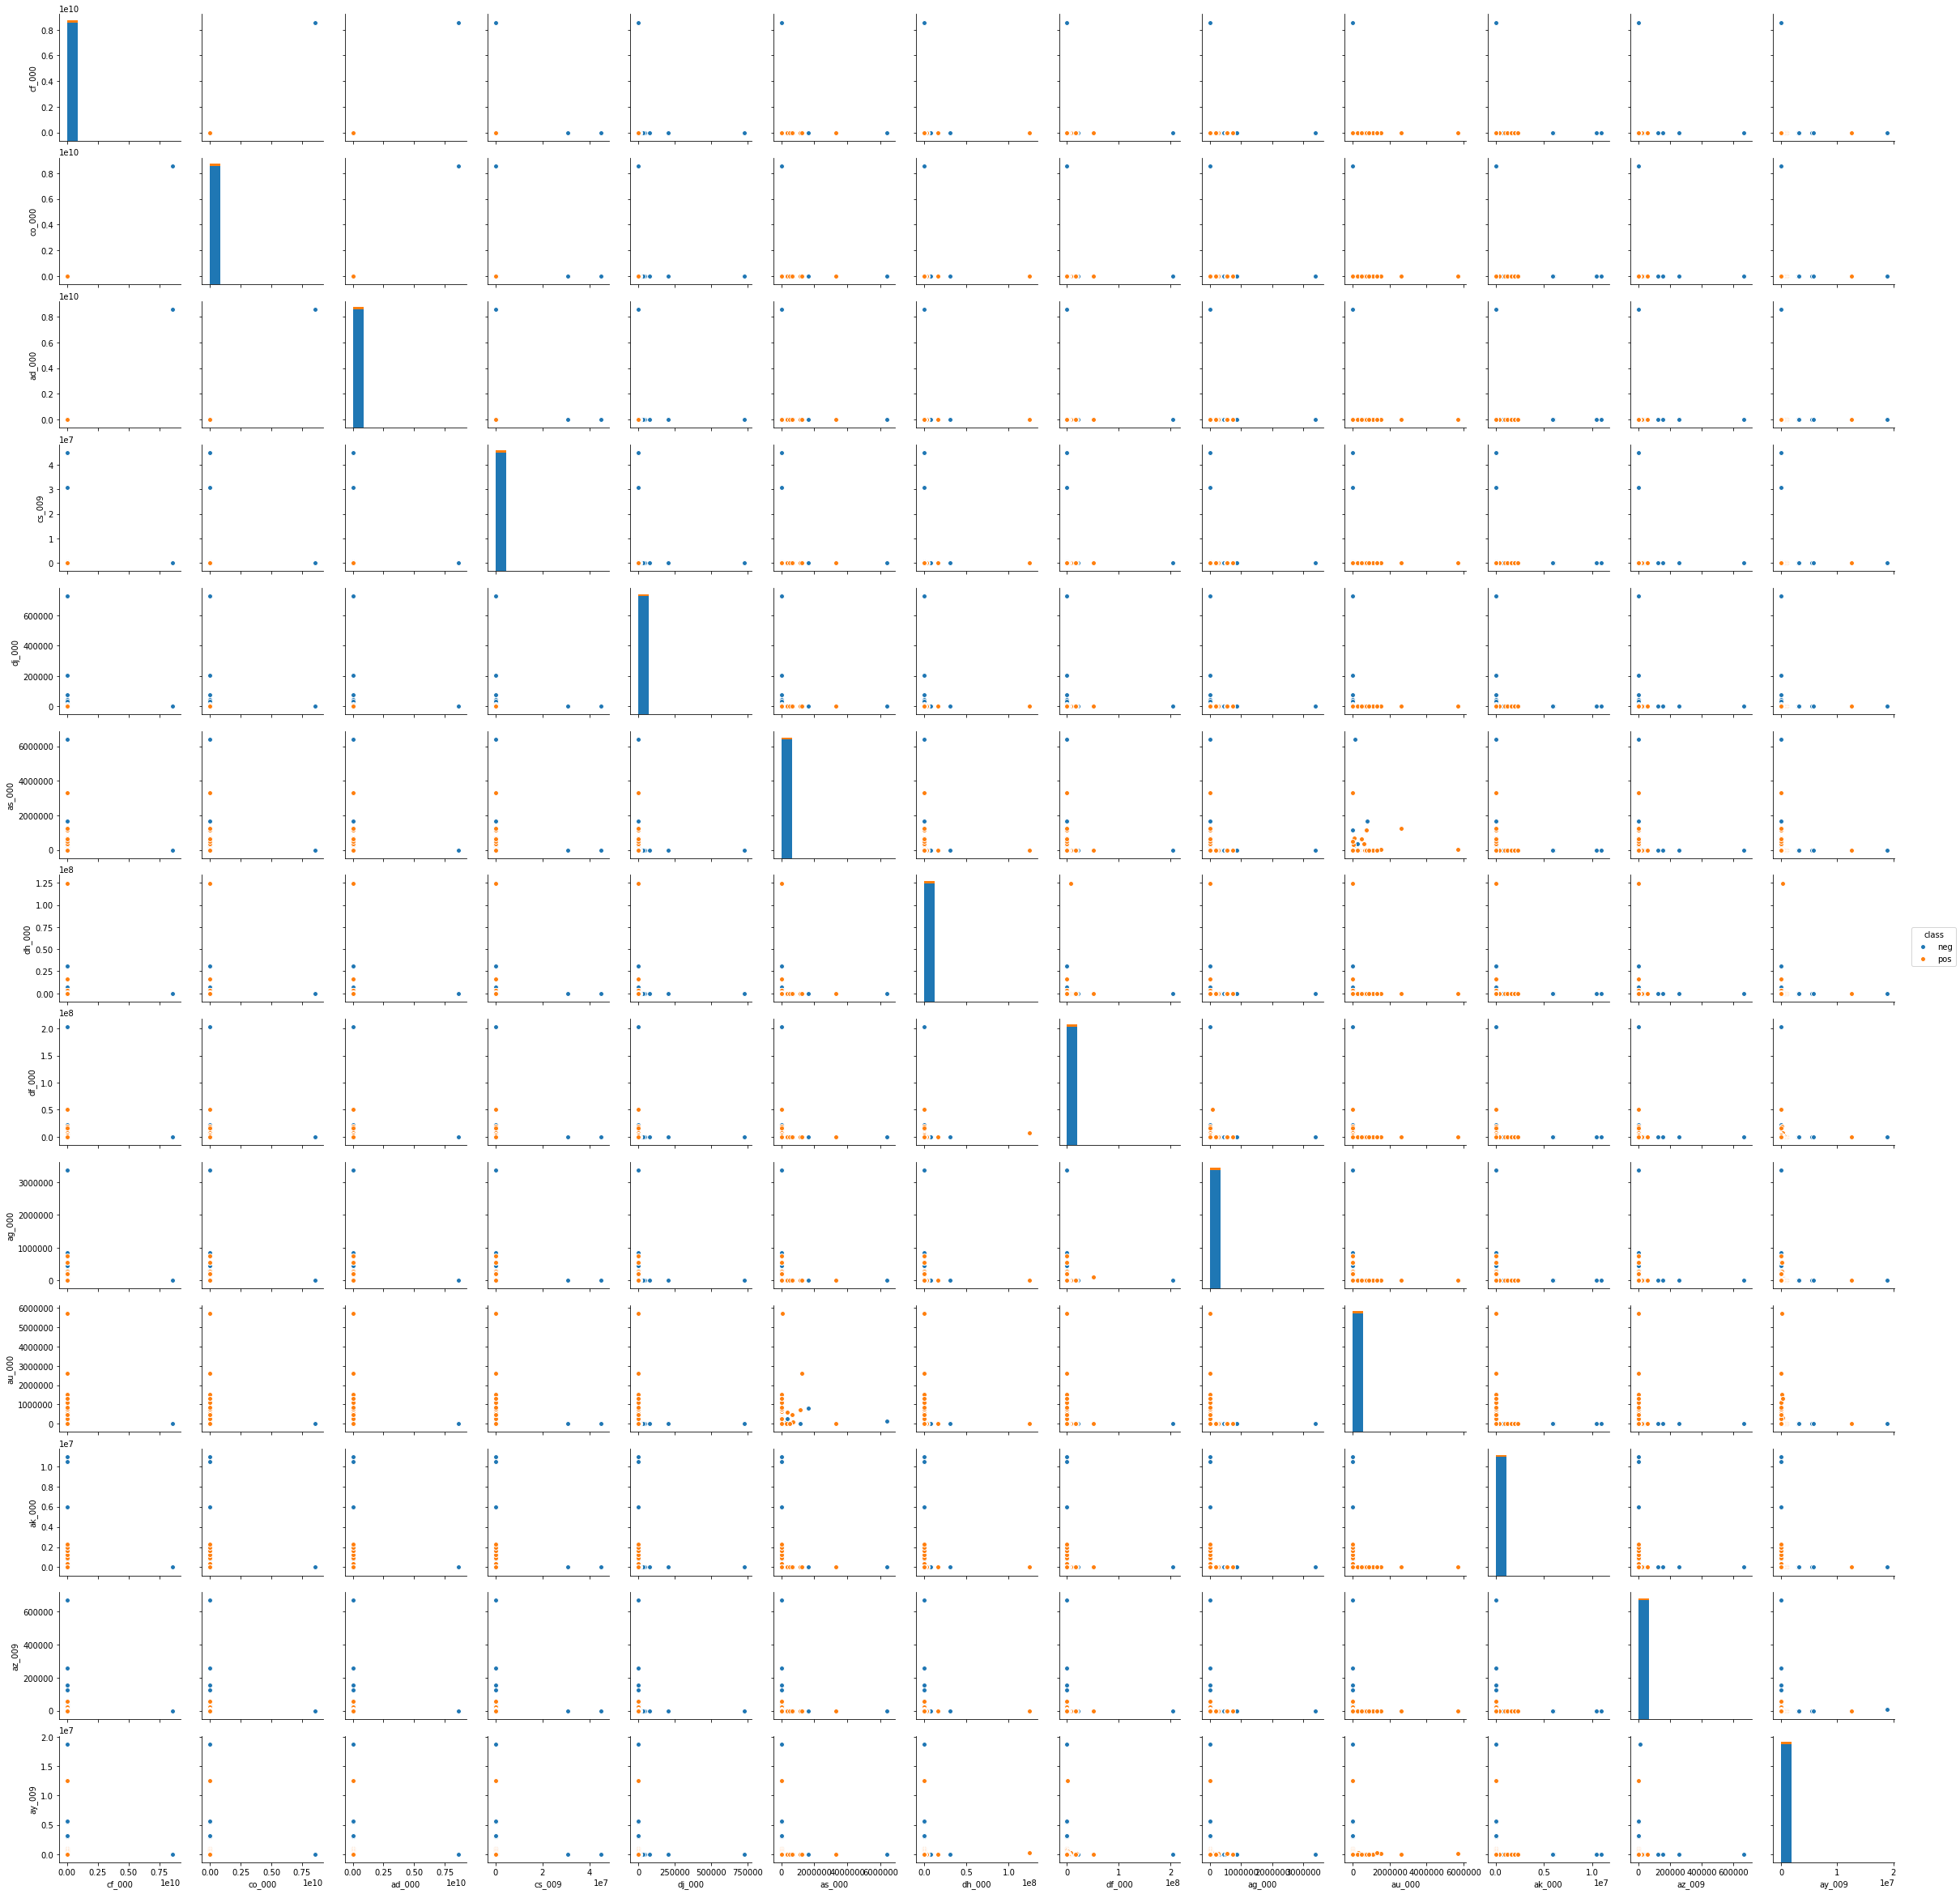

In [42]:
sns.pairplot(b_iv,hue='class')
plt.show()

#### no, I can't see any obvious linear relationship from this scatter plots.

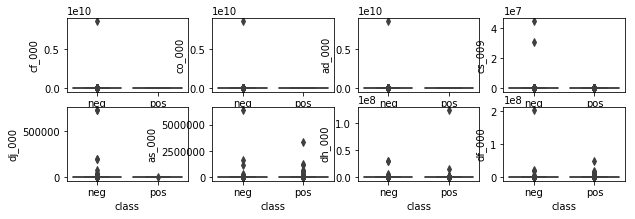

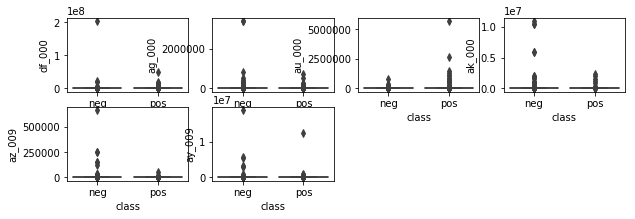

In [43]:
plt.figure(figsize=[10,3])
for i,j in enumerate(b_iv.columns[0:-6]):
    plt.subplot(int(241+i))
    sns.boxplot(x='class',y=j,data=b_iv)
plt.show()

plt.figure(figsize=[10,3])
for i,j in enumerate(b_iv.columns[7:-1]):
    plt.subplot(int(241+i))
    sns.boxplot(x='class',y=j,data=b_iv)
plt.show()

### 2-b-v

In [44]:
len(df_imp[df_imp['class']=='neg'])

74625

In [45]:
76000-74625

1375

Among 76000 observations, there are 74625 observations 'negative', only 1375 observations 'positive'.

Therefore this is a vey imbalanced dataset.

### 2-(c)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,oob_score=True)
trax=df_p2_train.iloc[:,0:-1]
tray=df_p2_train.iloc[:,-1]
tex=df_p2_test.iloc[:,0:-1]
tey=df_p2_test.iloc[:,-1]
model=rf.fit(trax,tray)

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [47]:
# train accuracy
train_score=model.score(trax,tray)
print('missclasification for train: ',1-train_score)

# test accuracy
test_score=model.score(tex,tey)
print('missclassification for test: ',1-test_score)

# oob score
oob=model.oob_score_
print('out of bag score is : ',oob)

# confusion matrics
from sklearn.metrics import confusion_matrix 
ypred= model.predict(trax)
confusion_matrix(tray, ypred)


missclasification for train:  0.0005500000000000504
missclassification for test:  0.008750000000000036
out of bag score is :  0.99165


array([[58999,     1],
       [   32,   968]])

#### oob score is higher than test score, and test error is higher than train error.

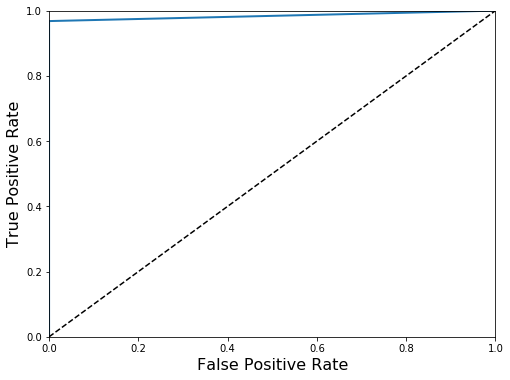

train auc= 0.9839915254237288


In [48]:
# make y binary {-1,1}
tray=tray.replace({'neg':-1,'pos':1})
ypred=pd.Series(ypred).replace({'neg':-1,'pos':1})

# roc,auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(tray, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


# Area under curve
from sklearn.metrics import roc_auc_score
print('train auc=',roc_auc_score(tray, ypred))


In [49]:
print('confusin matrics for test')
# confusion matrics
from sklearn.metrics import confusion_matrix 
ypred= model.predict(tex)
confusion_matrix(tey, ypred)

confusin matrics for test


array([[15608,    17],
       [  123,   252]])

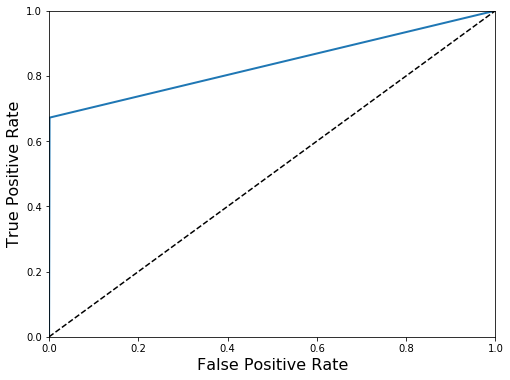

test auc= 0.8354560000000001


In [50]:
# make y binary {-1,1}
tey=tey.replace({'neg':-1,'pos':1})
ypred=pd.Series(ypred).replace({'neg':-1,'pos':1})

# roc,auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(tey, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# Area under curve
from sklearn.metrics import roc_auc_score
print('test auc=',roc_auc_score(tey, ypred))

#### train has obviously higher AUC than test.

### 2-d-research

Random forests are built on decision trees, and decision trees are sensitive to class imbalance. 

Each tree is built on a bag, and each bag is a uniform random sample from the data (with replacement). Therefore each tree will be biased in the same direction and magnitude (on average) by class imbalance.

In [51]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0,class_weight="balanced",oob_score=True)

# Train model
bal=clf.fit(trax,tray)

# train accuracy
train_score2=bal.score(trax,tray)
print('train misclassification rate is: ',1-train_score2)

# test accuracy
test_score2=bal.score(tex,tey)
print('test misclassification rate is: ',1-test_score2)

# oob score
oob=bal.oob_score_
print('out of bag score is : ',oob)

# confusion matrics
ypred= bal.predict(trax)
confusion_matrix(tray, ypred)

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/jialinshi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


train misclassification rate is:  0.0010666666666666602
test misclassification rate is:  0.013187500000000019
out of bag score is :  0.9896


array([[59000,     0],
       [   64,   936]])

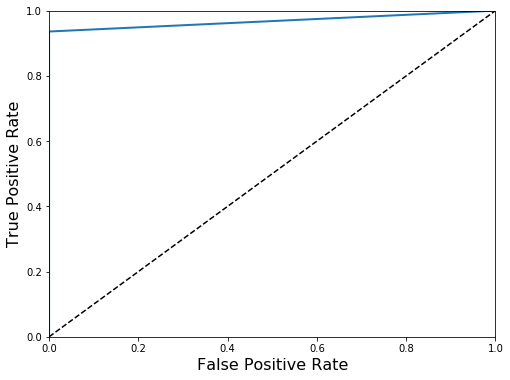

In [52]:
# roc,auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(tray, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [53]:
# Area under curve
from sklearn.metrics import roc_auc_score
print('train auc= ',roc_auc_score(tray, ypred))

train auc=  0.968


In [54]:
# confusion matrics
print('test confusion matrix')
ypred= bal.predict(tex)
confusion_matrix(tey, ypred)

test confusion matrix


array([[15603,    22],
       [  189,   186]])

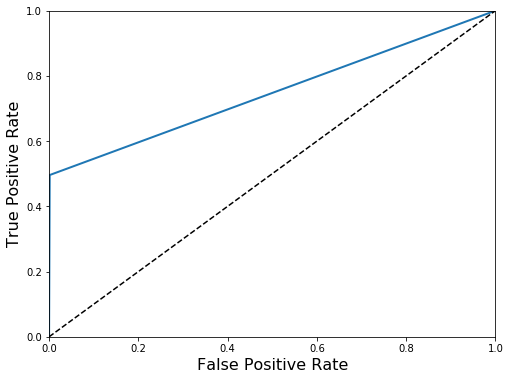

In [55]:
# roc,auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(tey, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [56]:
# Area under curve
from sklearn.metrics import roc_auc_score
print('test auc= ',roc_auc_score(tey, ypred))

test auc=  0.747296


#### 2-(d) After balancing the dataset,  the misclassification rates go higher for both train and test, but the train error is always lower than test error.  The roc_auc_score becomes lower, and has high test error. 


## 2e

#### 2-e I can't successfully start jvm in ANYWAY. It seems to conflict with my OS version or JAVA environment or any reasons that I can't solve. After trying for 3days, I gave up. I decide to directly use weka and make reports.

#### Please see attached document for weka report.

## 2-f

In [57]:
# use smote to upsample the data
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=123)
x,y=sm.fit_resample(trax,tray)
sm_trax=pd.DataFrame(x)
sm_tray=pd.DataFrame(y)
sm_tray=sm_tray.replace({-1:'neg',1:'pos'})
sm_tray.columns=['class']
sm_train=pd.concat([sm_trax,sm_tray],axis=1)

In [58]:
sm_train.columns=df_p2_train.columns

In [59]:
sm_train.to_csv('sm_train.csv',index=False)

In [60]:
df_p2_test.columns=sm_train.columns
df_p2_test.to_csv('sm_test.csv',index=False)

#### use smote to upsample the data and write to csv files for weka.
#### Please see attached document for weka report.

## ISLR 9.7.3

(a)

In [61]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
color = ["red", "red", "red", "red", "blue", "blue", "blue"]
df=pd.DataFrame([x1,x2,color],index=['x1','x2','color'])
df=df.T
df.index = np.arange(1,8)
df

x1 x2 color
1  3  4   red
2  2  2   red
3  4  4   red
4  1  4   red
5  2  1  blue
6  4  3  blue
7  4  1  blue

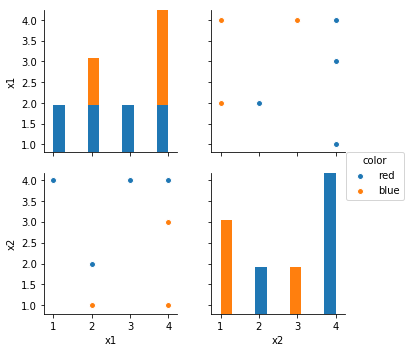

In [62]:
sns.pairplot(df,hue='color')

(b)

In [63]:
# x=2
y2_diff = (2+1)/2
# x=4
y4_diff = (4+3)/2
x=[x1[4],x1[6]]
y_diff=[y2_diff,y4_diff]

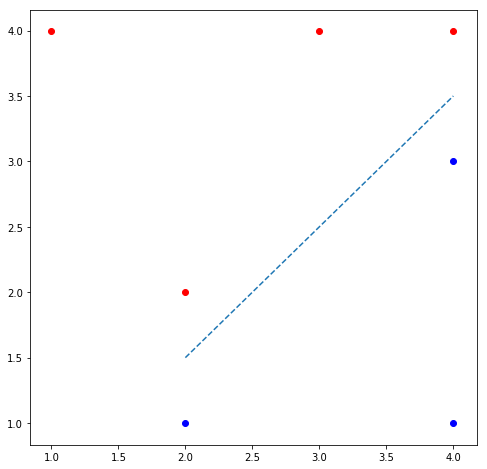

In [64]:
x1[0:-4]
x2[0:-4]
plt.scatter(x1[0:-3],x2[0:-3],color='red')
plt.scatter(x1[-3:],x2[-3:],color='blue')
plt.plot(x, y_diff, '--')

(c)

k = (y2-y1)/(x2-x1) =(3.5-1.5)/(4-2)= 1

intercept = x2-x1 =1.5-2 =-0.5

Therefore, 0.5−X1+X2>0

(d)

<function matplotlib.pyplot.show(*args, **kw)>

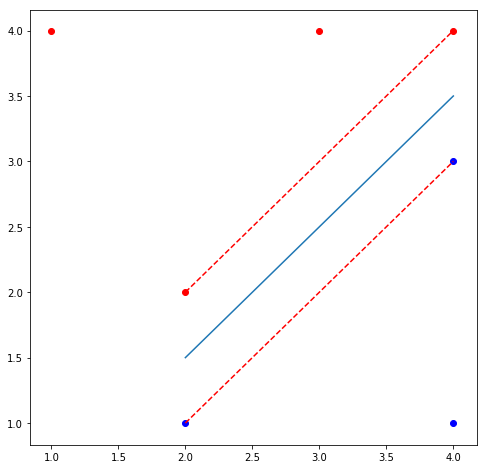

In [65]:
x=[x1[4],x1[5]]
y_0=[2,4]
y=[x2[4],x2[5]]
plt.scatter(x1[0:-3],x2[0:-3],color='red')
plt.scatter(x1[-3:],x2[-3:],color='blue')
plt.plot(x, y_diff)
plt.plot(x, y,'r--')
plt.plot(x, y_0,'r--')
plt.show

(e)

<function matplotlib.pyplot.show(*args, **kw)>

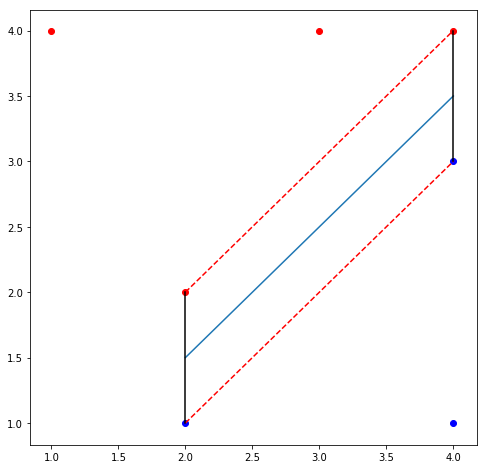

In [66]:
x1_sp=[2,2]
y1_sp=[1,2]
x2_sp=[4,4]
y2_sp=[3,4]
plt.scatter(x1[0:-3],x2[0:-3],color='red')
plt.scatter(x1[-3:],x2[-3:],color='blue')
plt.plot(x, y_diff)
plt.plot(x, y,'r--')
plt.plot(x, y_0,'r--')
plt.plot(x1_sp, y1_sp, c = 'black')
plt.plot(x2_sp, y2_sp, c = 'black')
plt.show

(f)

As long as 7th observation (4,1) blue does not move exceed the maximal margin, it will not have an effect on the maximal margin hyperplane.


(g)

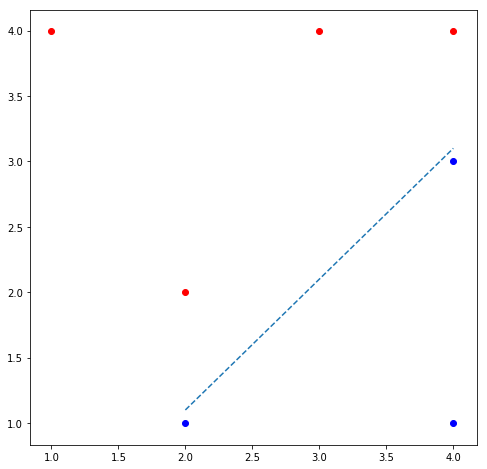

In [67]:
y_diff=[y2_diff-0.4,y4_diff-0.4]
x1[0:-4]
x2[0:-4]
plt.scatter(x1[0:-3],x2[0:-3],color='red')
plt.scatter(x1[-3:],x2[-3:],color='blue')
plt.plot(x, y_diff, '--')

k remain 1

intercept = x2-x1 =1.1-2=-0.9

Therefore, 0.9−X1+X2>0

(h)

In [68]:
x1 = [3, 2, 4, 1, 2, 4, 4,4]
x2 = [4, 2, 4, 4, 1, 3, 1,1.5]
color = ["red", "red", "red", "red", "blue", "blue", "blue","red"]

In [69]:
x_red=[3,2,4,1,4]
y_red=[4,2,4,4,1.5]


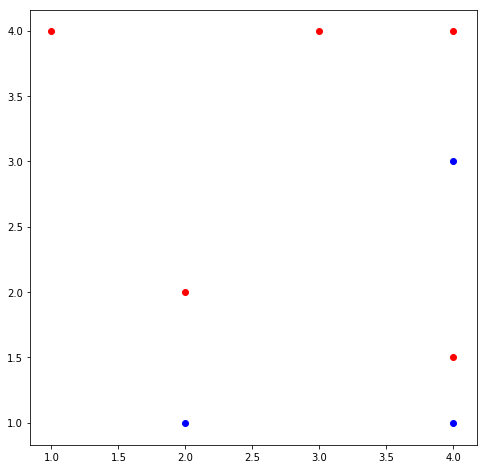

In [70]:
plt.scatter(x_red,y_red,color='red')
plt.scatter(x1[-4:-1],x2[-4:-1],color='blue')